Importamos las librerias a usar


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funciones as f
from textblob import TextBlob
archivo = r'C:/Users/aball/OneDrive/Escritorio/Proyecto1/Datasets/csv/user_reviews_Analisis_sentimientos.csv'


In [117]:
df_user_reviews = pd.read_csv(archivo)
df_user_reviews

,user_id,user_url,posted,item_id,recommend,review,analisis_sentimiento
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250.0,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted July 15, 2011.",22200.0,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted April 21, 2011.",43110.0,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610.0,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,"Posted September 8, 2013.",227300.0,True,For a simple (it's actually not all that simpl...,2
...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 10.,70.0,True,a must have classic from steam definitely wort...,2
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 8.,362890.0,True,this game is a perfect remake of the original ...,2
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 3.,273110.0,True,had so much fun plaing this and collecting res...,2
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 20.,730.0,True,:D,2


Revisamos los tipos de datos y la existencia de nulos


In [118]:
f.tipo_datos(df_user_reviews)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.00,0.00,0
1,user_url,[<class 'str'>],100.00,0.00,0
2,posted,"[<class 'str'>, <class 'float'>]",99.95,0.05,28
3,item_id,[<class 'float'>],99.95,0.05,28
4,recommend,"[<class 'bool'>, <class 'float'>]",99.95,0.05,28
5,review,"[<class 'str'>, <class 'float'>]",99.90,0.10,58
6,analisis_sentimiento,[<class 'int'>],100.00,0.00,0


Revisamos el analisis de sentimientos donde podemos ver que el 88.80% ofrecio sentimiento positivo

In [119]:
f.resumen_porcentajes(df_user_reviews, 'analisis_sentimiento')

,Cantidad,Porcentaje
analisis_sentimiento,,
2,52689,88.80
0,6123,10.32
1,521,0.88


Observamos la cantidad de usuarios unicos que ofrecieron su opinion

In [120]:
print(f"Cantidad de usuarios que opinaron: {len(df_user_reviews['user_id'].unique())}")

Cantidad de usuarios que opinaron: 25485


Preparamos el Dataset para su posterior graficacion para poder observar la distribucion de reviews

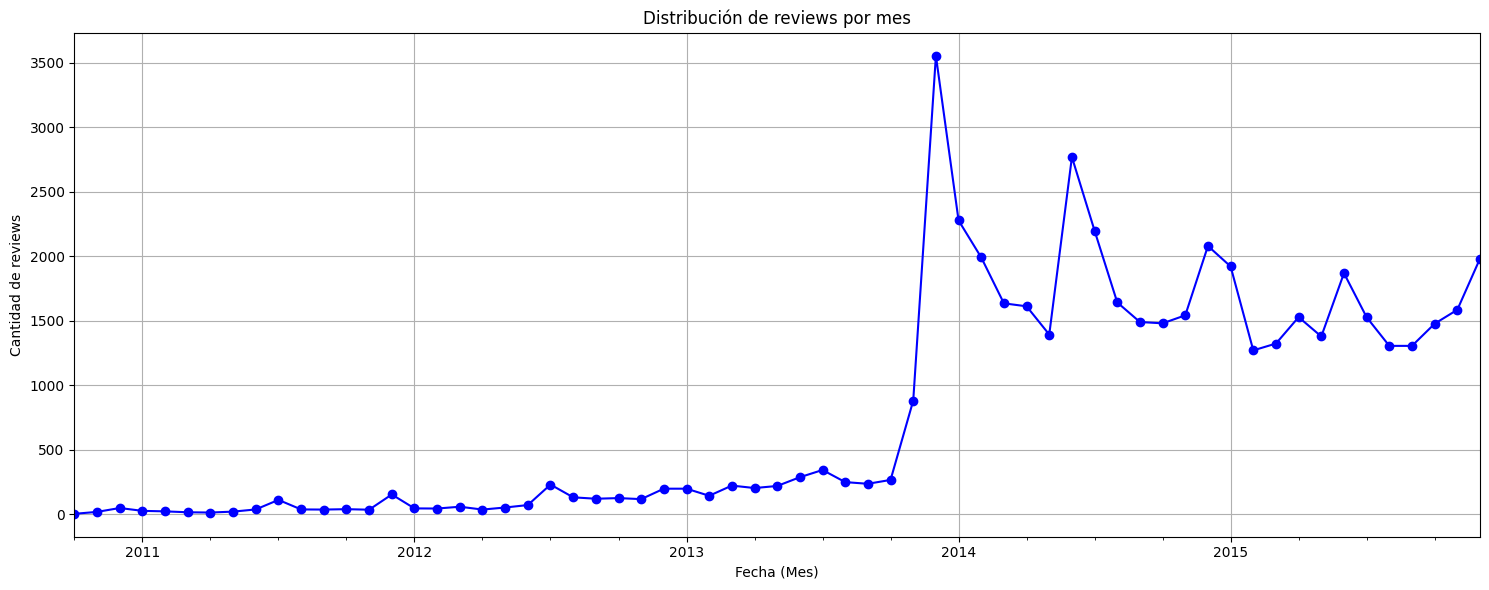

In [121]:
# Limpiamos las fechas y convertimos al formato datetime
df_user_reviews["posted"] = df_user_reviews["posted"].astype(str)
df_user_reviews["posted"] = df_user_reviews["posted"].str.replace('Posted ', '', regex=False).str.replace('.', '', regex=False)
df_user_reviews["posted"] = pd.to_datetime(df_user_reviews["posted"], errors='coerce')

# Eliminamos filas con fechas inválidas
df_user_reviews = df_user_reviews.dropna(subset=['posted'])

# Agrupamos por mes utilizando resample
df_counts = df_user_reviews.set_index('posted').resample('M').size()

# Graficamos la cantidad de reviews por mes
plt.figure(figsize=(15, 6))
df_counts.plot(kind='line', marker='o', linestyle='-', color='blue')

# Configuramos el grafico
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de reviews')
plt.title('Distribución de reviews por mes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [122]:
# Creamos Dataset steam games normalizado
df_steam_games = pd.read_csv(r'C:/Users/aball/OneDrive/Escritorio/Proyecto1/Datasets/csv\steam_games_normalizado.csv')
df_steam_games

,id,app_name,developer,genres,tags,price,release_date
0,761140.0,Lost Summoner Kitty,Kotoshiro,Action,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,2018-01-04
1,643980.0,Ironbound,Secret Level SRL,Indie,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",Free To Play,2018-01-04
2,670290.0,Real Pool 3D - Poolians,Poolians.com,Casual,"['Free to Play', 'Simulation', 'Sports', 'Casu...",Free to Play,2017-07-24
3,767400.0,弹炸人2222,彼岸领域,Action,"['Action', 'Adventure', 'Casual']",0.99,2017-12-07
4,773570.0,Log Challenge,NaN,Action,"['Action', 'Indie', 'Casual', 'Sports']",2.99,NaN
...,...,...,...,...,...,...,...
32130,773640.0,Colony On Mars,"Nikita ""Ghost_RUS""",Casual,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.99,2018-01-04
32131,733530.0,LOGistICAL: South Africa,Sacada,Casual,"['Strategy', 'Indie', 'Casual']",4.99,2018-01-04
32132,610660.0,Russian Roads,Laush Dmitriy Sergeevich,Indie,"['Indie', 'Simulation', 'Racing']",1.99,2018-01-04
32133,658870.0,EXIT 2 - Directions,"xropi,stev3ns",Casual,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",4.99,2017-09-02


Observamos los tipos de datos y la existencia de nulos


In [123]:
f.tipo_datos(df_steam_games)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id,[<class 'float'>],99.99,0.01,2
1,app_name,"[<class 'str'>, <class 'float'>]",99.99,0.01,2
2,developer,"[<class 'str'>, <class 'float'>]",89.94,10.06,3234
3,genres,"[<class 'str'>, <class 'float'>]",99.50,0.50,162
4,tags,"[<class 'str'>, <class 'float'>]",99.57,0.43,139
5,price,"[<class 'str'>, <class 'float'>]",95.71,4.29,1377
6,release_date,"[<class 'str'>, <class 'float'>]",93.57,6.43,2067


Revisamos el total de juegos unicos registrados

In [124]:
total_juegos = len(df_steam_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 32133


Preparamos los datos para graficar los Generos mas frecuentes

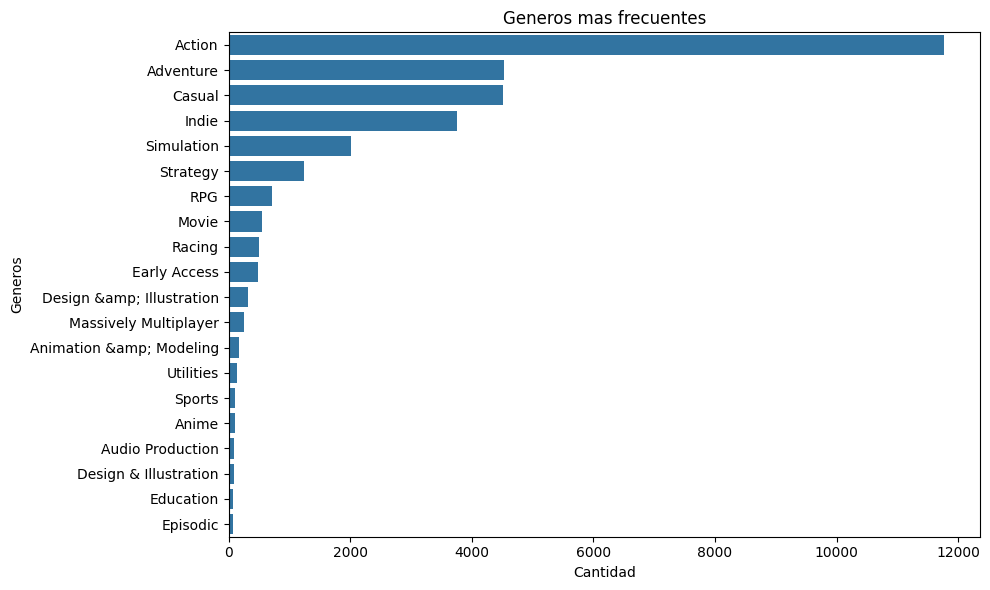

In [125]:
# Calculamos la frecuencia de cada género
genre_counts = df_steam_games['genres'].value_counts()

# Seleccionamos los 20 géneros más frecuentes
top_genres = genre_counts.head(20)

# Creamos un DataFrame con los géneros más comunes y sus frecuencias
generos = pd.DataFrame({'Genre': top_genres.index, 'Count': top_genres.values})

# Graficamos los géneros más comunes
plt.figure(figsize=(10, 6))
sns.barplot(data=generos, x='Count', y='Genre')
plt.xlabel('Cantidad')
plt.ylabel('Generos')
plt.title('Generos mas frecuentes')
plt.tight_layout()
plt.show()

Revisamos el porcentaje de generos de los primeros 20


In [126]:
porcentaje_generos = f.resumen_porcentajes(df_steam_games, 'genres')
porcentaje_generos.head(20)

,Cantidad,Porcentaje
genres,,
Action,11770,36.63
Adventure,4530,14.10
Casual,4521,14.07
Indie,3763,11.71
Simulation,2019,6.28
Strategy,1245,3.87
RPG,718,2.23
Movie,552,1.72
Racing,504,1.57


Preparamos datos para graficar la cantidad de registros por año

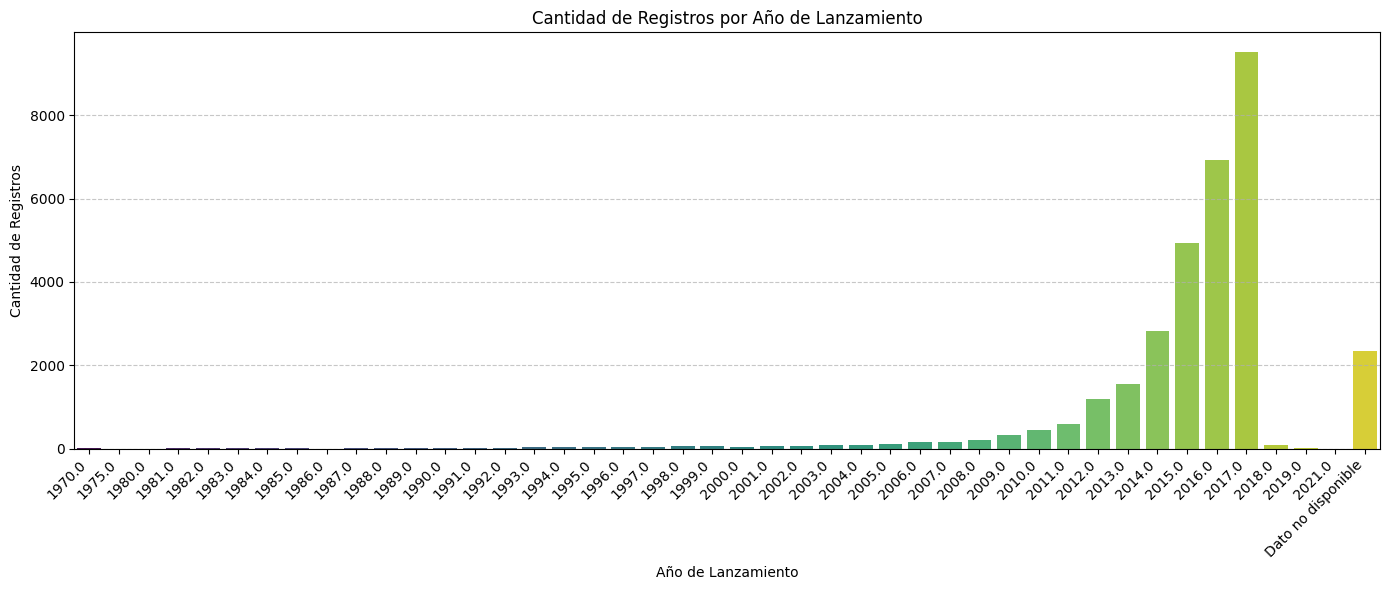

In [127]:

# Cambiamos release_date a un formato deseado
df_steam_games['release_date'] = df_steam_games['release_date'].astype(str)

# Reemplazamos "Dato no disponible" con un valor nulo 
df_steam_games['release_date'] = df_steam_games['release_date'].replace(['Dato no disponible'], pd.NA)

# Convertimos las fechas al formato datetime
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')

# Extraemos el año de las fechas
df_steam_games['year'] = df_steam_games['release_date'].dt.year

# Rellenamos los nulos con la etiqueta 'Dato no disponible' y convertir todo a tipo string
df_steam_games['year'] = df_steam_games['year'].fillna('Dato no disponible').astype(str)

# Contamos la frecuencia de cada año
frecuencia_anios = df_steam_games['year'].value_counts().sort_index()

# Creamos el gráfico de barras 
plt.figure(figsize=(14, 6))
sns.barplot(x=frecuencia_anios.index, y=frecuencia_anios.values, palette="viridis")

# Ajustamos el grafico
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Preparamos los datos para graficar un top 10 Developers por cantidad de juegos

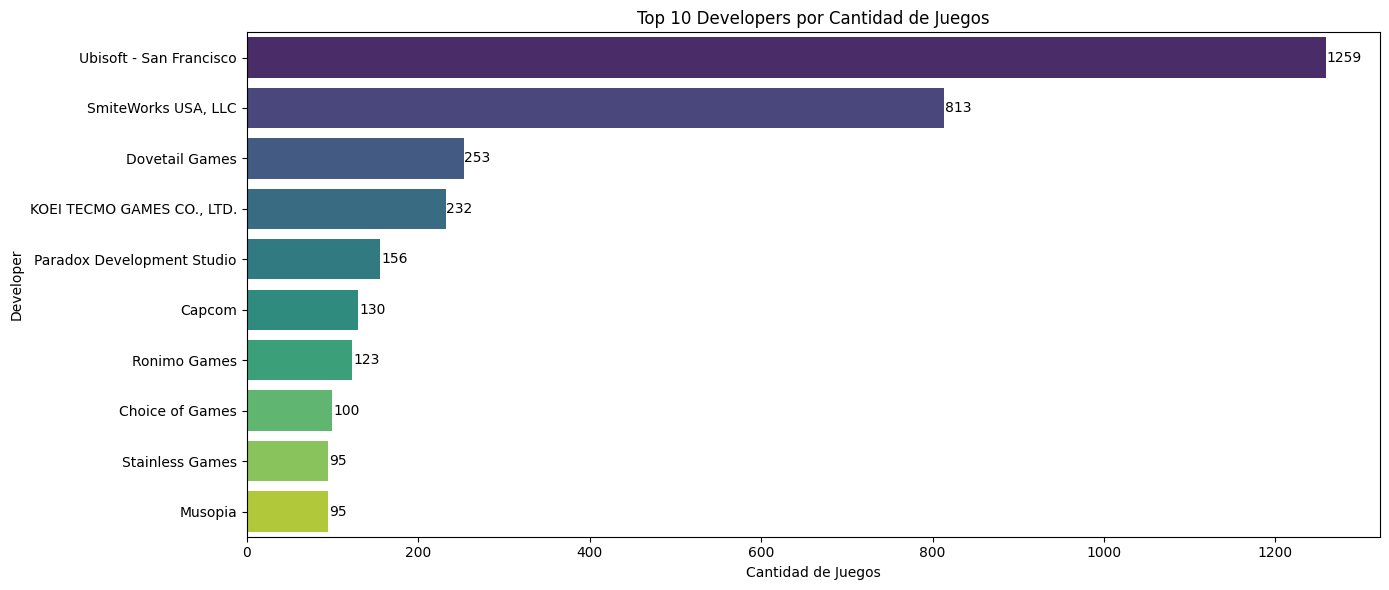

In [128]:
# Contamos la cantidad de juegos por developer
conteo_developer = df_steam_games['developer'].value_counts().head(10)

# Creamos la figura
plt.figure(figsize=(14, 6))

# Creamos un gráfico de barras
sns.barplot(
    x=conteo_developer.values, 
    y=conteo_developer.index, 
    palette="viridis"
)

# Configuramos el grafico
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Developer')
plt.title('Top 10 Developers por Cantidad de Juegos')

# Agregamos los valores sobre las barras
for index, value in enumerate(conteo_developer.values):
    plt.text(value + 1, index, str(value), va='center', ha='left', fontsize=10)

plt.tight_layout()

plt.show()


Graficamos la distribucion de precios para deteccion de outlayers


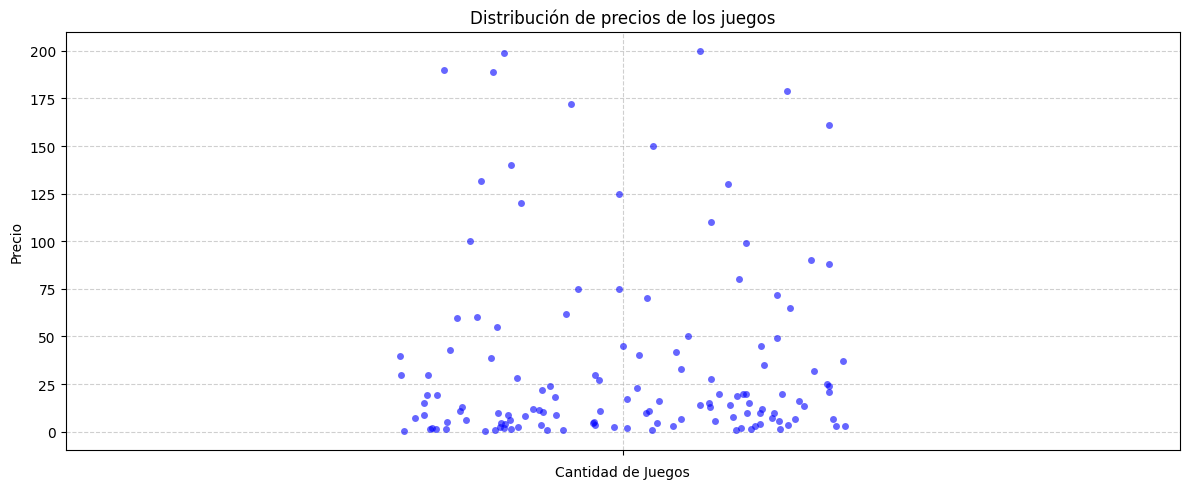

In [129]:
# Convertimos la columna 'price' a numérico, reemplazando valores no convertibles por nulos y eliminarlos
df_steam_games['price'] = pd.to_numeric(df_steam_games['price'], errors='coerce')

# Filtramos precios y eliminar nulos
df_precio_filtrado = df_steam_games[(df_steam_games['price'] <= 200) & (df_steam_games['price'].notna())]

# Creamos un DataFrame con precios únicos
df_precios_uni = df_precio_filtrado[['price']].drop_duplicates().sort_values(by='price')

# Creamos el grafico
plt.figure(figsize=(12, 5))

# Creamos grafico stripplot
sns.stripplot(
    data=df_precios_uni, 
    y='price', 
    jitter=0.2, 
    color='blue',
    alpha=0.6,
    marker='o',
    size=5
)
plt.ylabel('Precio')
plt.xlabel('Cantidad de Juegos')
plt.title('Distribución de precios de los juegos')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [132]:
df_user_items = pd.read_csv(r'C:/Users/aball/OneDrive/Escritorio/Proyecto1/Datasets/csv/user_items_normalizado.csv')

Observamos los tipos de datos y la existencia de nulos

In [133]:
f.tipo_datos(df_user_items)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.00,0.00,0
1,items_count,[<class 'int'>],100.00,0.00,0
2,steam_id,[<class 'int'>],100.00,0.00,0
3,user_url,[<class 'str'>],100.00,0.00,0
4,item_id,[<class 'float'>],99.67,0.33,16806
5,item_name,"[<class 'str'>, <class 'float'>]",99.67,0.33,16806
6,playtime_forever,[<class 'float'>],99.67,0.33,16806
7,playtime_2weeks,[<class 'float'>],99.67,0.33,16806


Preparamos los datos para graficar el top 10 usuarios con mas horas jugadas

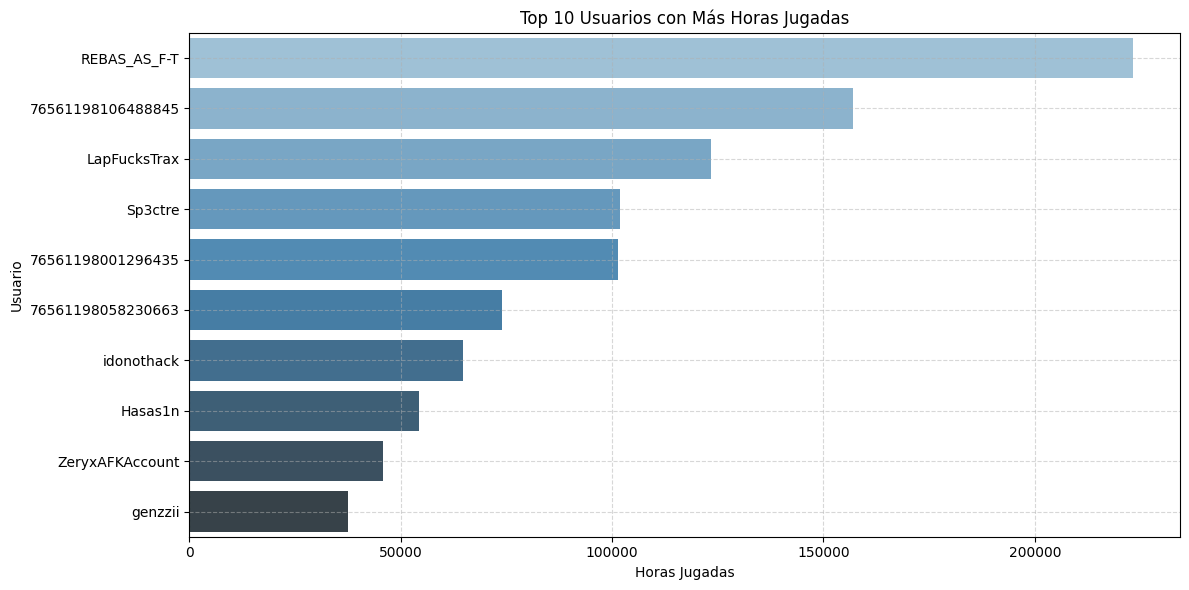

In [143]:
# Seleccionamos los 10 usuarios con más horas jugadas
top_users = (
    df_user_items.groupby('user_id')['playtime_2weeks']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Creamos la figura para el gráfico
plt.figure(figsize=(12, 6))

# Creamos un gráfico de barras para los usuarios con más horas jugadas
sns.barplot(
    x=top_users.values, 
    y=top_users.index, 
    palette='Blues_d'
)

# Configuramos el grafico
plt.xlabel('Horas Jugadas')
plt.ylabel('Usuario')
plt.title('Top 10 Usuarios con Más Horas Jugadas')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
